<h2>imports</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow import keras as tf
import pickle
from tensorflow import greater, reshape
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
with open('../pickles/train_test_rs.pkl', 'rb') as pickle_in:
    X_train, X_test, y_train, y_test = pickle.load(pickle_in)

In [3]:
X_train.shape

(1357, 35)

<h2>Model Set Up</h2>

In [4]:
rec = tf.metrics.Recall()

2021-10-18 21:18:00.555389: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-18 21:18:00.555782: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-18 21:18:00.557911: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model = tf.Sequential([
    tf.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    tf.layers.Dense(64, activation='relu'),
    tf.layers.Dense(128, activation='relu'),
    tf.layers.Dense(128, activation='relu'),
    tf.layers.Dense(64, activation='relu'),
    tf.layers.Dense(16, activation='relu'),
    tf.layers.Dense(1, activation = 'sigmoid')

])

In [6]:

model.compile(optimizer='adam', loss= tf.losses.BinaryCrossentropy(),  metrics=['accuracy', rec])
es = tf.callbacks.EarlyStopping(patience = 20, restore_best_weights=True, monitor='val_recall')

model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_test, y_test))

In [7]:
model.fit(X_train, y_train, batch_size = 32, epochs = 1000, validation_data = (X_test, y_test), callbacks=[es])

2021-10-18 21:18:01.842901: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-18 21:18:01.861355: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1696065000 Hz


Epoch 1/1000
43/43 [==============================] - 5s 69ms/step - loss: 0.6677 - accuracy: 0.5946 - recall: 0.2895 - val_loss: 0.5555 - val_accuracy: 0.7552 - val_recall: 0.4314
Epoch 2/1000
43/43 [==============================] - 2s 41ms/step - loss: 0.5323 - accuracy: 0.7424 - recall: 0.6217 - val_loss: 0.5497 - val_accuracy: 0.7657 - val_recall: 0.5098
Epoch 3/1000
43/43 [==============================] - 2s 37ms/step - loss: 0.4175 - accuracy: 0.8132 - recall: 0.7534 - val_loss: 0.4965 - val_accuracy: 0.7937 - val_recall: 0.4510
Epoch 4/1000
43/43 [==============================] - 2s 42ms/step - loss: 0.3034 - accuracy: 0.8832 - recall: 0.8681 - val_loss: 0.5123 - val_accuracy: 0.8287 - val_recall: 0.4314
Epoch 5/1000
43/43 [==============================] - 2s 37ms/step - loss: 0.2204 - accuracy: 0.9121 - recall: 0.9154 - val_loss: 0.6787 - val_accuracy: 0.7657 - val_recall: 0.4902
Epoch 6/1000
43/43 [==============================] - 2s 43ms/step - loss: 0.1903 - accuracy: 0

In [8]:
preds = greater(model.predict(X_test), .35)

In [9]:
metrics.recall_score(y_test,preds)

0.3137254901960784

In [10]:

metrics.accuracy_score(y_test,reshape(preds, preds.shape[0] ))

0.8146853146853147

In [11]:
y_train.mean()

0.4812085482682388

In [12]:
df2 = pd.read_csv('../data/attrition-formated.csv')
df2.dropna(inplace=True)
df['Attrition'].mean()

NameError: name 'df' is not defined

In [ ]:
df['Attrition'].mean()

In [ ]:
sc = StandardScaler()
df2 = pd.get_dummies(df2, columns = ['EducationField'] )
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns=['Attrition']), df2['Attrition'], stratify = df2['Attrition'])
X_train_df = pd.DataFrame(X_train)
X_train_df['Attrition'] = y_train
rs = X_train_df[X_train_df['Attrition'] == 1].sample(500, replace = True)

X_train_df = pd.concat([X_train_df, rs])
X_train_df['Attrition'].mean()

In [ ]:
X_train = sc.fit_transform(X_train_df.drop(columns=['Attrition']))
y_train = X_train_df['Attrition']
X_test = sc.transform(X_test)

In [63]:
model2 = tf.Sequential([
    tf.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    tf.layers.Dropout(0.2),
    tf.layers.Dense(64, activation='relu'),
    tf.layers.Dropout(0.2),
    tf.layers.Dense(128, activation='relu'),
    tf.layers.Dropout(0.2),
    tf.layers.Dense(128, activation='relu'),
    tf.layers.Dropout(0.2),
    tf.layers.Dense(64, activation='relu'),
    tf.layers.Dropout(0.2),
    tf.layers.Dense(16, activation='relu'),
    tf.layers.Dense(1, activation = 'sigmoid')

])

model2.compile(optimizer='adam', loss= tf.losses.BinaryCrossentropy(),  metrics=['accuracy', rec])
es = tf.callbacks.EarlyStopping(patience = 20, restore_best_weights=True, monitor='val_recall')

In [64]:
model2.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_test, y_test), callbacks=[es])

Epoch 1/100
43/43 [==============================] - 4s 52ms/step - loss: 0.6958 - accuracy: 0.5232 - recall: 0.6320 - val_loss: 0.7285 - val_accuracy: 0.4860 - val_recall: 0.6667
Epoch 2/100
43/43 [==============================] - 2s 40ms/step - loss: 0.6648 - accuracy: 0.5887 - recall: 0.6135 - val_loss: 0.6030 - val_accuracy: 0.7657 - val_recall: 0.4118
Epoch 3/100
43/43 [==============================] - 2s 38ms/step - loss: 0.6266 - accuracy: 0.6761 - recall: 0.5112 - val_loss: 0.6145 - val_accuracy: 0.7133 - val_recall: 0.6078
Epoch 4/100
43/43 [==============================] - 2s 44ms/step - loss: 0.5818 - accuracy: 0.7070 - recall: 0.5982 - val_loss: 0.5158 - val_accuracy: 0.7762 - val_recall: 0.5294
Epoch 5/100
43/43 [==============================] - 2s 36ms/step - loss: 0.5220 - accuracy: 0.7429 - recall: 0.6719 - val_loss: 0.6014 - val_accuracy: 0.7098 - val_recall: 0.6863
Epoch 6/100
43/43 [==============================] - 1s 24ms/step - loss: 0.5274 - accuracy: 0.7498 

In [77]:
preds = greater(model2.predict(X_test), .44)
base_preds = [0] 
metrics.recall_score(y_test,reshape(preds, preds.shape[0] ))

0.6666666666666666

In [78]:
metrics.accuracy_score(y_test,reshape(preds, preds.shape[0] ))

0.6433566433566433

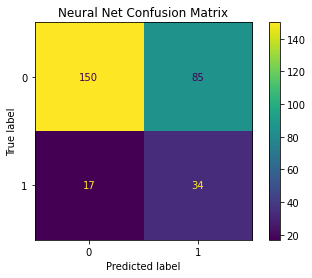

In [79]:
con = metrics.confusion_matrix(y_test,reshape(preds, preds.shape[0] ))
metrics.ConfusionMatrixDisplay(con).plot()
plt.title('Neural Net Confusion Matrix')
plt.savefig('../output/nn.png');

In [ ]:
metrics.recall_score(y_test,reshape(preds, ))

In [ ]:
tf.models.save_model(model2, '../models/nn.tf' )

In [ ]:
model3 = tf.models.load_model('../models/nn.tf')

In [ ]:
preds = greater(model3.predict(X_test), .05)
metrics.recall_score(y_test,reshape(preds, preds.shape[0] ))

In [ ]:
metrics.accuracy_score(y_test,reshape(preds, preds.shape[0] ))

In [ ]:
df2['MaritalStatus'].mean()

In [ ]:
with open('../pickles/train_test.pkl', 'rb') as pickle_in:
    X_train, X_test, y_train, y_test = pickle.load(pickle_in)